In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img
from keras.utils import img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
labels_all = pd.read_csv("/content/dog_csv.csv")
print(labels_all.shape)
labels_all.head()

(930, 3)


,file_path,breed,dataset
0,train/Golden Retriever/001.jpg,Golden Retriever,train
1,train/Golden Retriever/002.jpg,Golden Retriever,train
2,train/Golden Retriever/003.jpg,Golden Retriever,train
3,train/Golden Retriever/004.jpg,Golden Retriever,train
4,train/Golden Retriever/005.jpg,Golden Retriever,train


In [ ]:
len(labels_all['breed'].unique()), labels_all['breed'].unique()

(7,
 array(['Golden Retriever', 'Bermaise', 'Pug', 'Chinese Crested',
        'Siberian Husky', 'Shih-Tzu', 'Cockapoo'], dtype=object))

In [ ]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head(10)

Shih-Tzu            198
Pug                 148
Bermaise            131
Cockapoo            129
Golden Retriever    127
Chinese Crested     118
Siberian Husky       79
Name: breed, dtype: int64

In [ ]:
# Selecting first 5 breeds (Limitation due to computation power)
CLASS_NAMES = ['Golden Retriever','Bermaise','Pug','Chinese Crested','Siberian Husky', 'Shih-Tzu', 'Cockapoo']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,file_path,breed,dataset
0,0,train/Golden Retriever/001.jpg,Golden Retriever,train
1,1,train/Golden Retriever/002.jpg,Golden Retriever,train
2,2,train/Golden Retriever/003.jpg,Golden Retriever,train
3,3,train/Golden Retriever/004.jpg,Golden Retriever,train
4,4,train/Golden Retriever/005.jpg,Golden Retriever,train


In [ ]:
!cp -r '/content/drive/MyDrive/jinshinn' '/content/'

In [ ]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = load_img('/content/jinshinn/' + labels['file_path'][i], target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 930/930 [00:02<00:00, 375.51it/s]


Train Images shape:  (930, 224, 224, 3)  size: 139,991,040
One-hot encoded output shape:  (930, 7)  size: 6,510


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0

In [ ]:

# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, Y_val))

Epoch 1/100
6/6 [==============================] - 118s 19s/step - loss: 5.7485 - accuracy: 0.1271 - val_loss: 5.6911 - val_accuracy: 0.1607
Epoch 2/100
6/6 [==============================] - 98s 16s/step - loss: 5.6588 - accuracy: 0.1570 - val_loss: 5.6253 - val_accuracy: 0.1310
Epoch 3/100
6/6 [==============================] - 100s 17s/step - loss: 5.5821 - accuracy: 0.1734 - val_loss: 5.5644 - val_accuracy: 0.1310
Epoch 4/100
6/6 [==============================] - 100s 17s/step - loss: 5.5097 - accuracy: 0.1704 - val_loss: 5.5145 - val_accuracy: 0.1310
Epoch 5/100
6/6 [==============================] - 101s 17s/step - loss: 5.4376 - accuracy: 0.1704 - val_loss: 5.4586 - val_accuracy: 0.1310
Epoch 6/100
6/6 [==============================] - 103s 17s/step - loss: 5.3666 - accuracy: 0.1749 - val_loss: 5.3920 - val_accuracy: 0.2143
Epoch 7/100
6/6 [==============================] - 110s 17s/step - loss: 5.2957 - accuracy: 0.2302 - val_loss: 5.3245 - val_accuracy: 0.1845
Epoch 8/100
6/

In [ ]:

model.save('dog_breedd.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


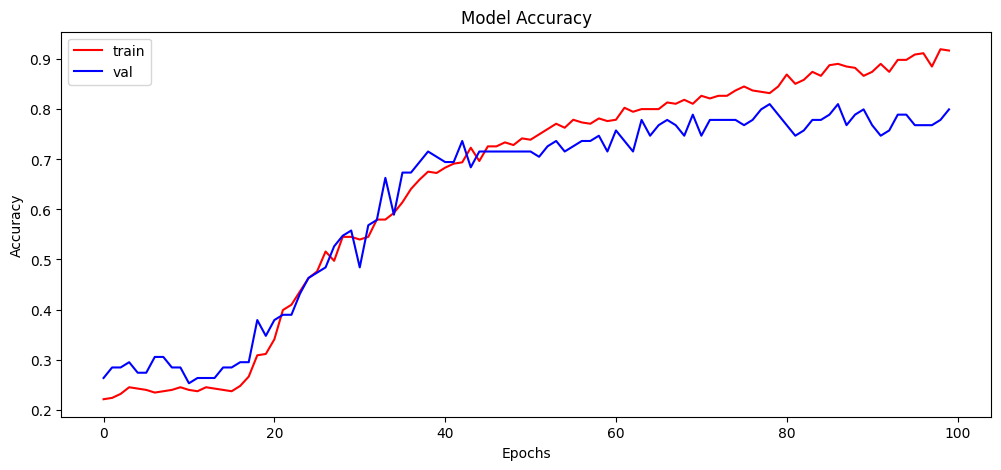

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:

Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 18ms/step - loss: 2.6497 - accuracy: 0.7358
Accuracy over the test set: 
  73.58 %


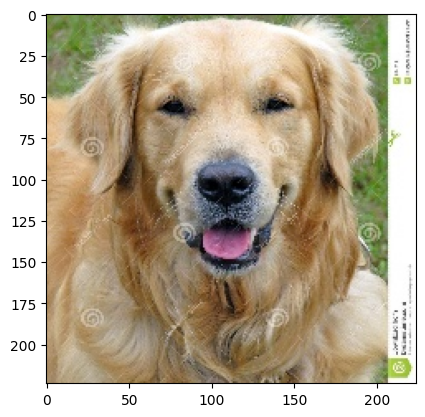

Originally :  Golden Retriever
Predicted :  Golden Retriever


In [ ]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])